In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set()

# Importing DATA

## EDA

In [1000]:
data = pd.read_csv('1.04.+Real-life+example.csv')

data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [1001]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [355]:
data[data['Price'].isnull()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
91,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GL 350
...,...,...,...,...,...,...,...,...,...
4229,Toyota,NaN,hatch,76,1.0,Petrol,yes,2007,Aygo
4231,Mercedes-Benz,NaN,crossover,27,3.0,Diesel,yes,2015,G 350
4260,BMW,NaN,crossover,0,3.0,Diesel,yes,2015,X6
4273,Volkswagen,NaN,other,197,2.0,Diesel,no,2011,T5 (Transporter)


In [583]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


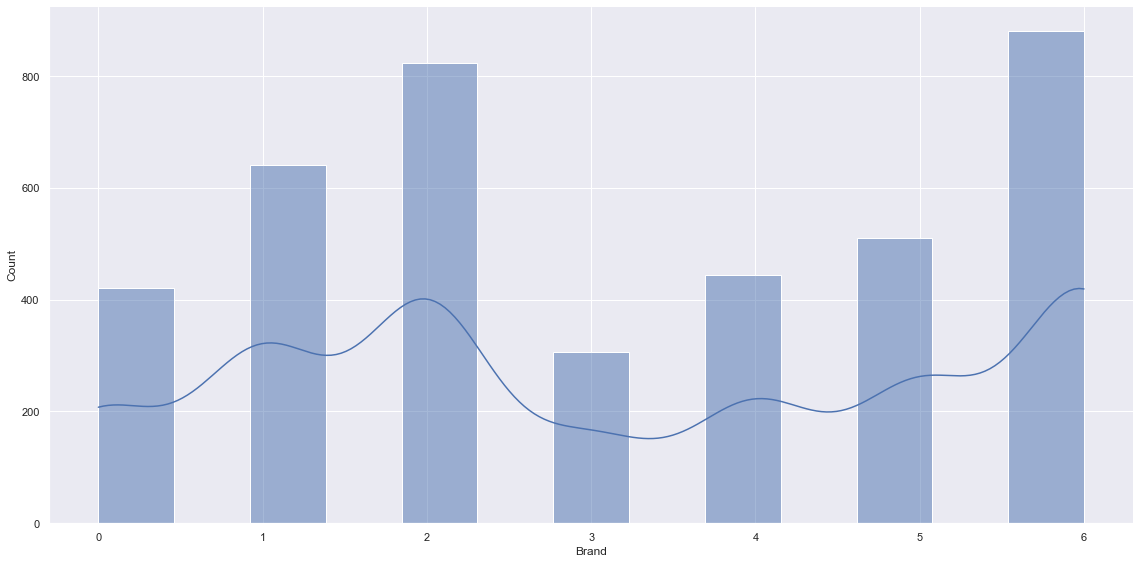

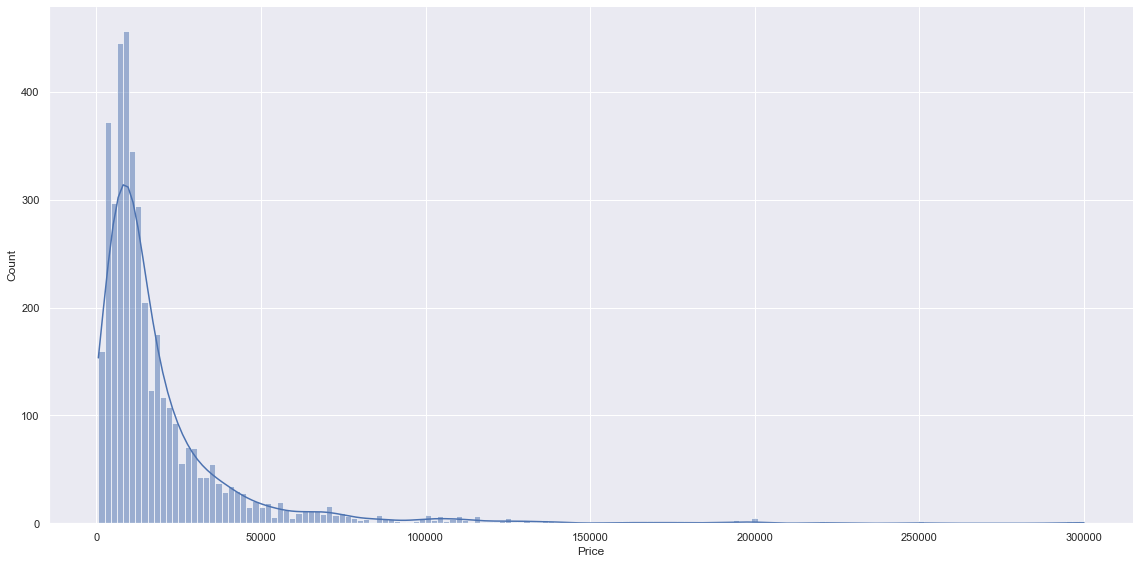

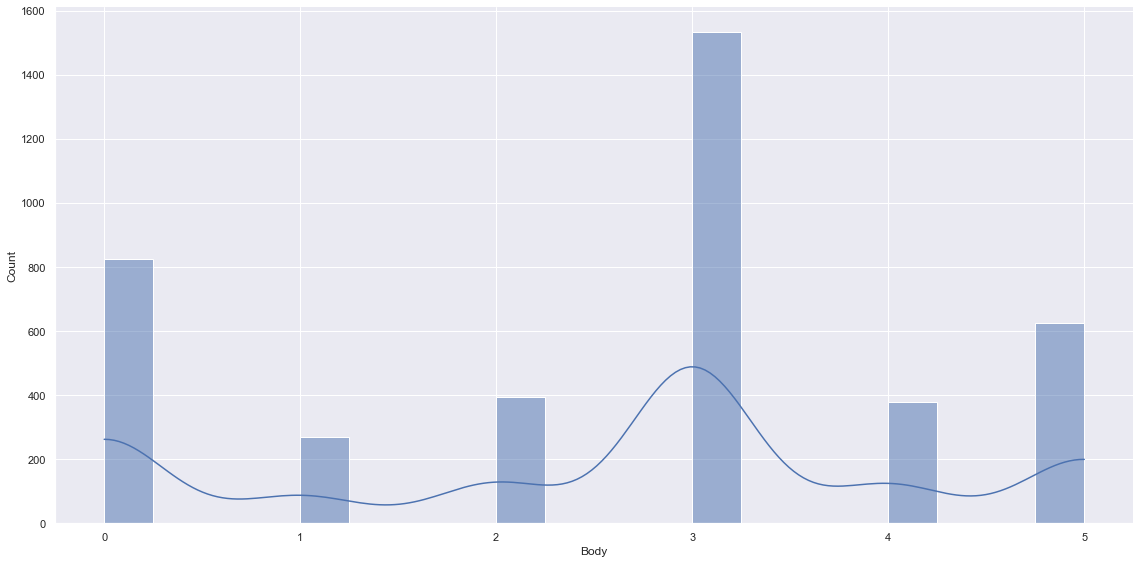

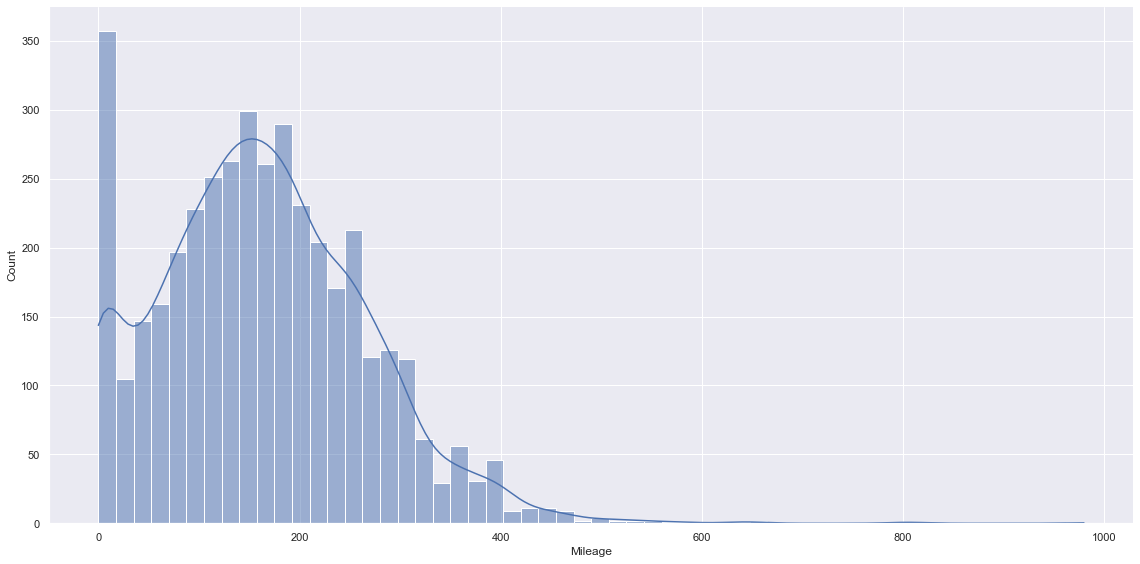

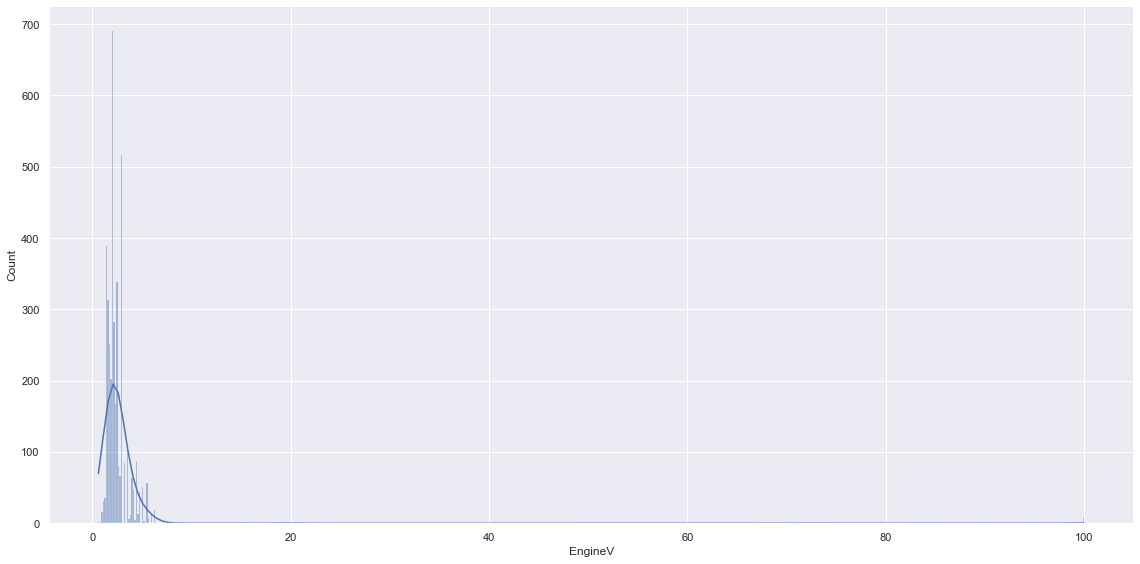

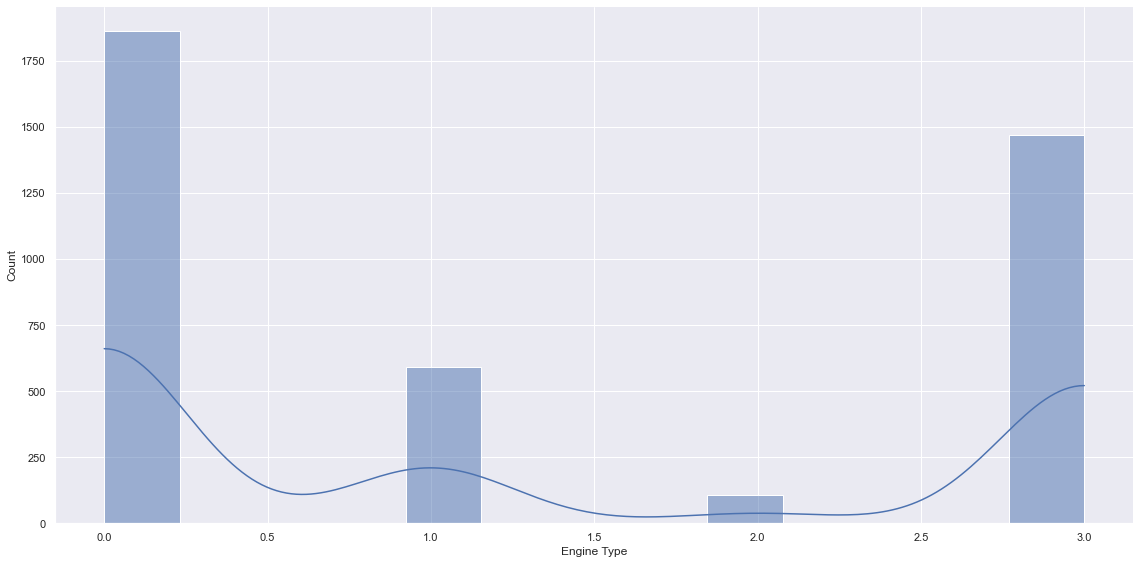

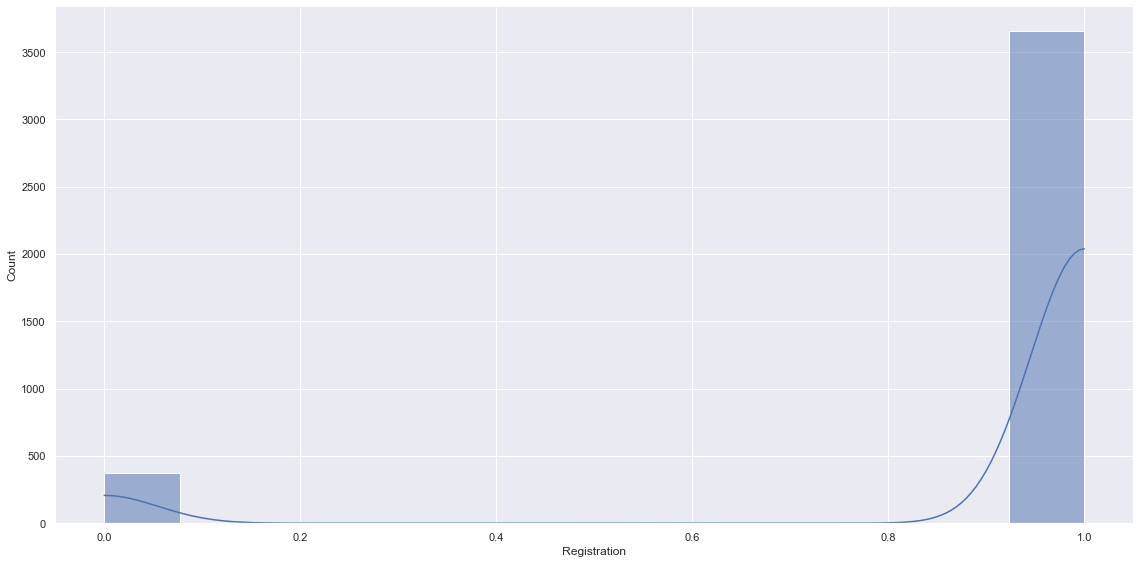

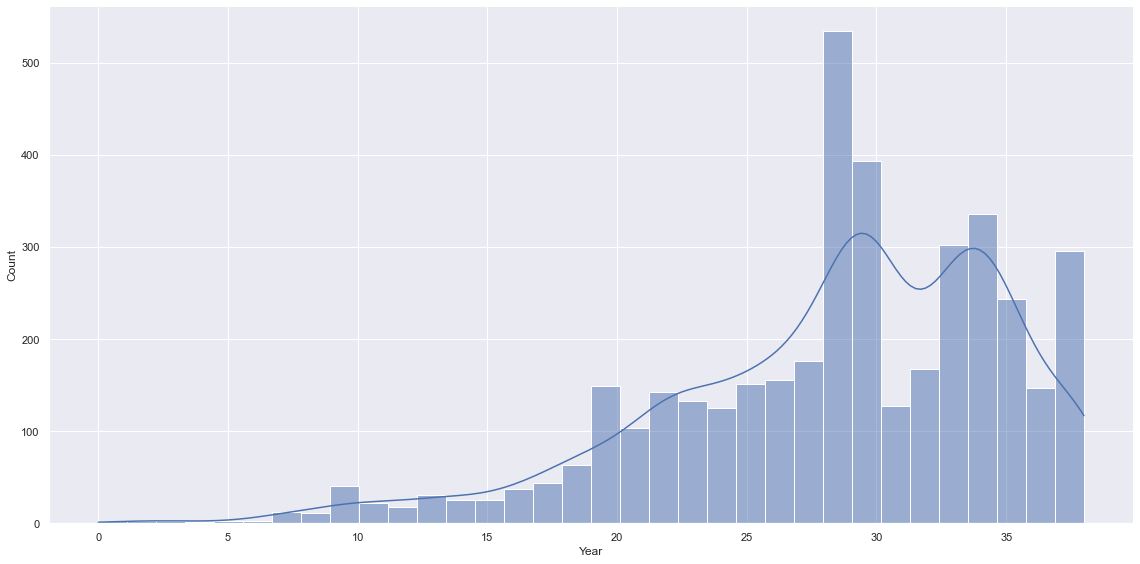

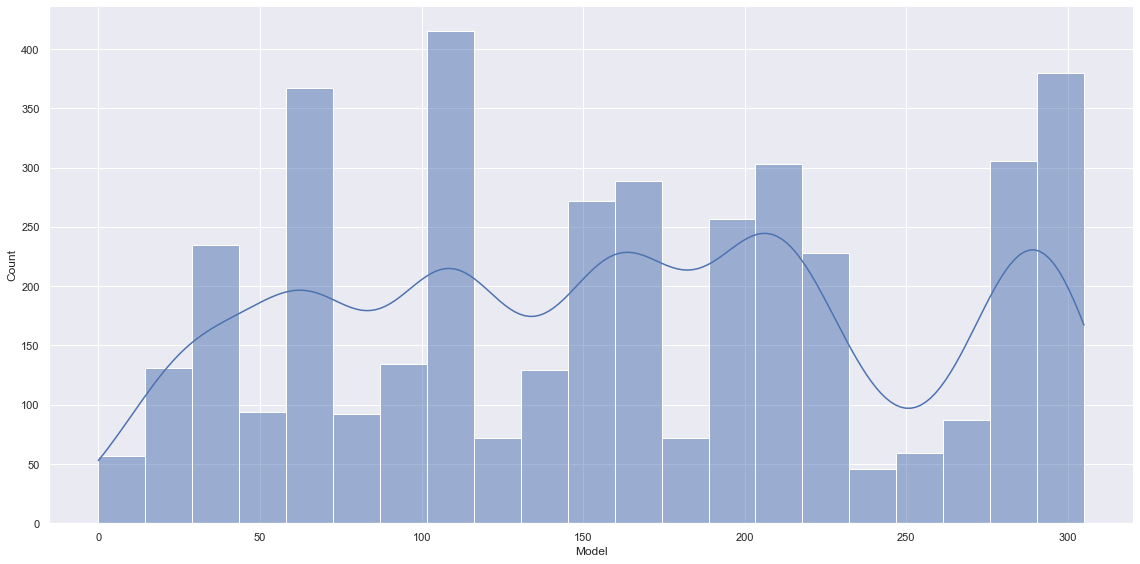

In [564]:
#ploting all variable
for col in data[data.columns]:
    sns.displot(data[col], kde=True, height=8, aspect=2)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: 

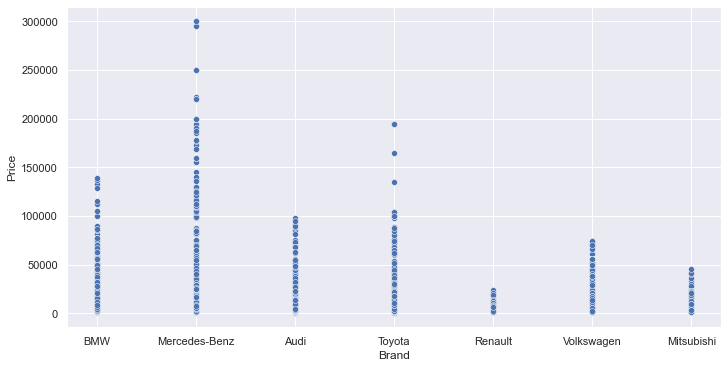

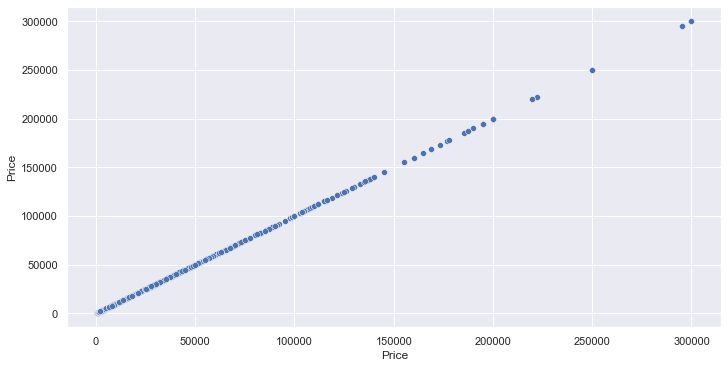

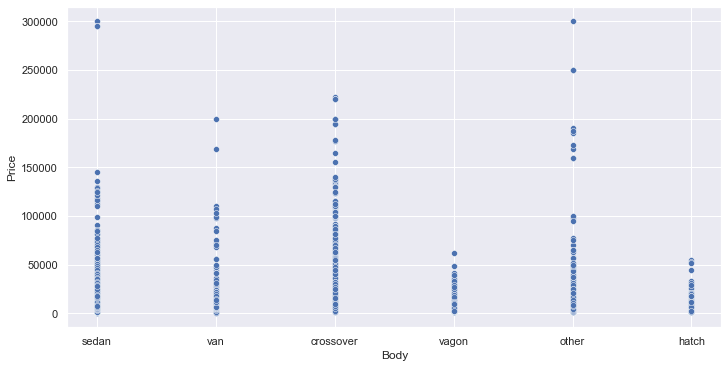

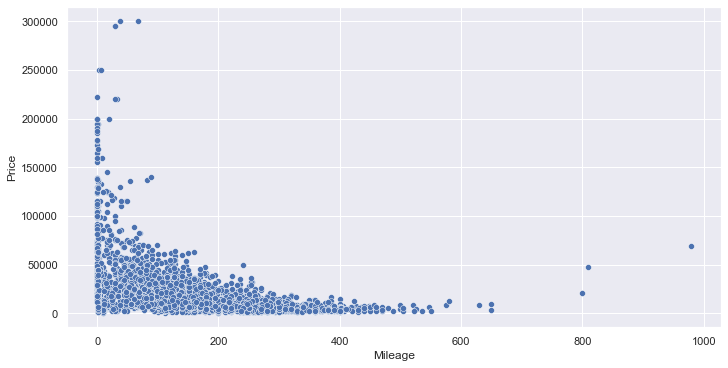

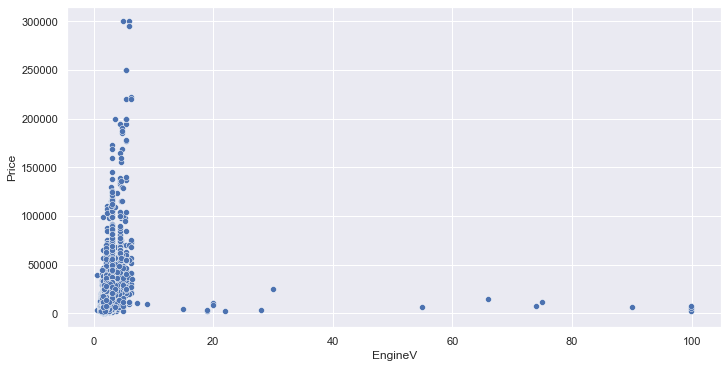

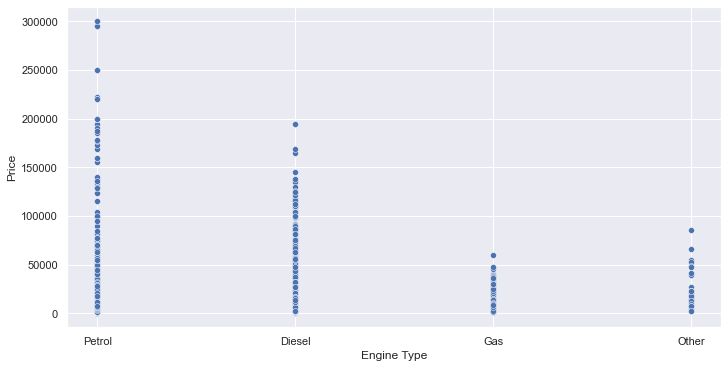

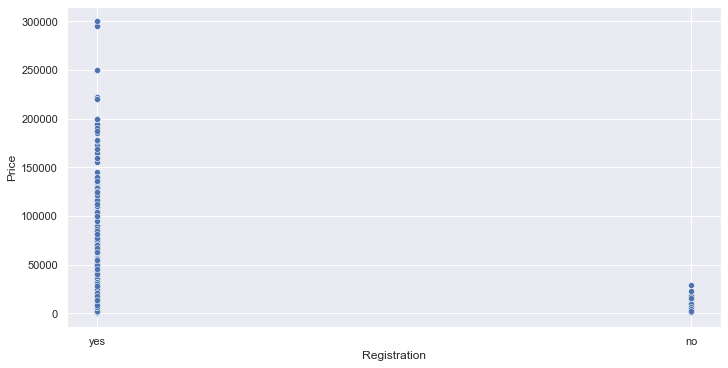

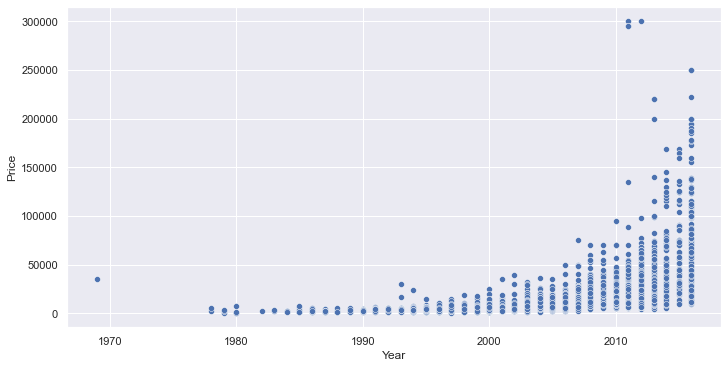

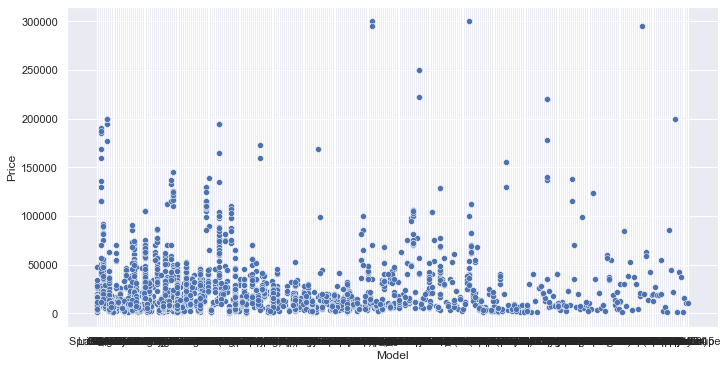

In [438]:
#scatering all numerical variable vs Price

for col in data[data.columns]:
    plt.figure(figsize=(10,5),constrained_layout=True)
    sns.scatterplot(data[col], data['Price'])      

# Preprocessing

In [1002]:
#droping missing values

data = data.dropna(axis=0)

#Removing Price outliars

data = data[data['Price']<data['Price'].quantile(q=0.99)]
#Removing Mileage outliars

data = data[data['Mileage']<data['Mileage'].quantile(q=0.99)]

#Removing EngineV outliars

data = data[data['EngineV']<data['EngineV'].quantile(q=0.99)]
#Removing Date outliars
data = data[data['Year']>data['Year'].quantile(q=0.01)]
#removing Registration col
#data = data.drop(labels='Registration', axis=1 )

In [1003]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000,3840
unique,7,NaN,6,NaN,NaN,4,2,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN,181
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865,NaN
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000,NaN


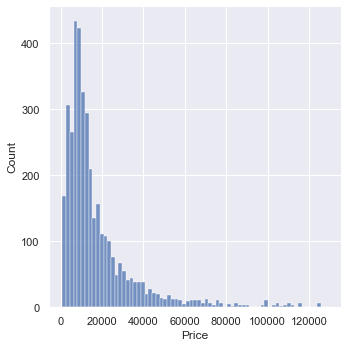

In [1004]:
sns.displot(data['Price']) # Price looks exponatial - we eill perform Log

In [1005]:
data.describe()

,Price,Mileage,EngineV,Year
count,3840.000000,3840.000000,3840.000000,3840.000000
mean,18028.973987,160.860156,2.424310,2006.702865
std,18963.887320,95.742943,0.899824,6.117627
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,92.000000,1.800000,2003.000000
50%,11525.000000,157.500000,2.200000,2008.000000
75%,21500.000000,226.000000,3.000000,2012.000000
max,129222.000000,435.000000,5.700000,2016.000000


# Check OLS assumption

### Linarity

Text(0.5, 1.0, 'Year vs Price')

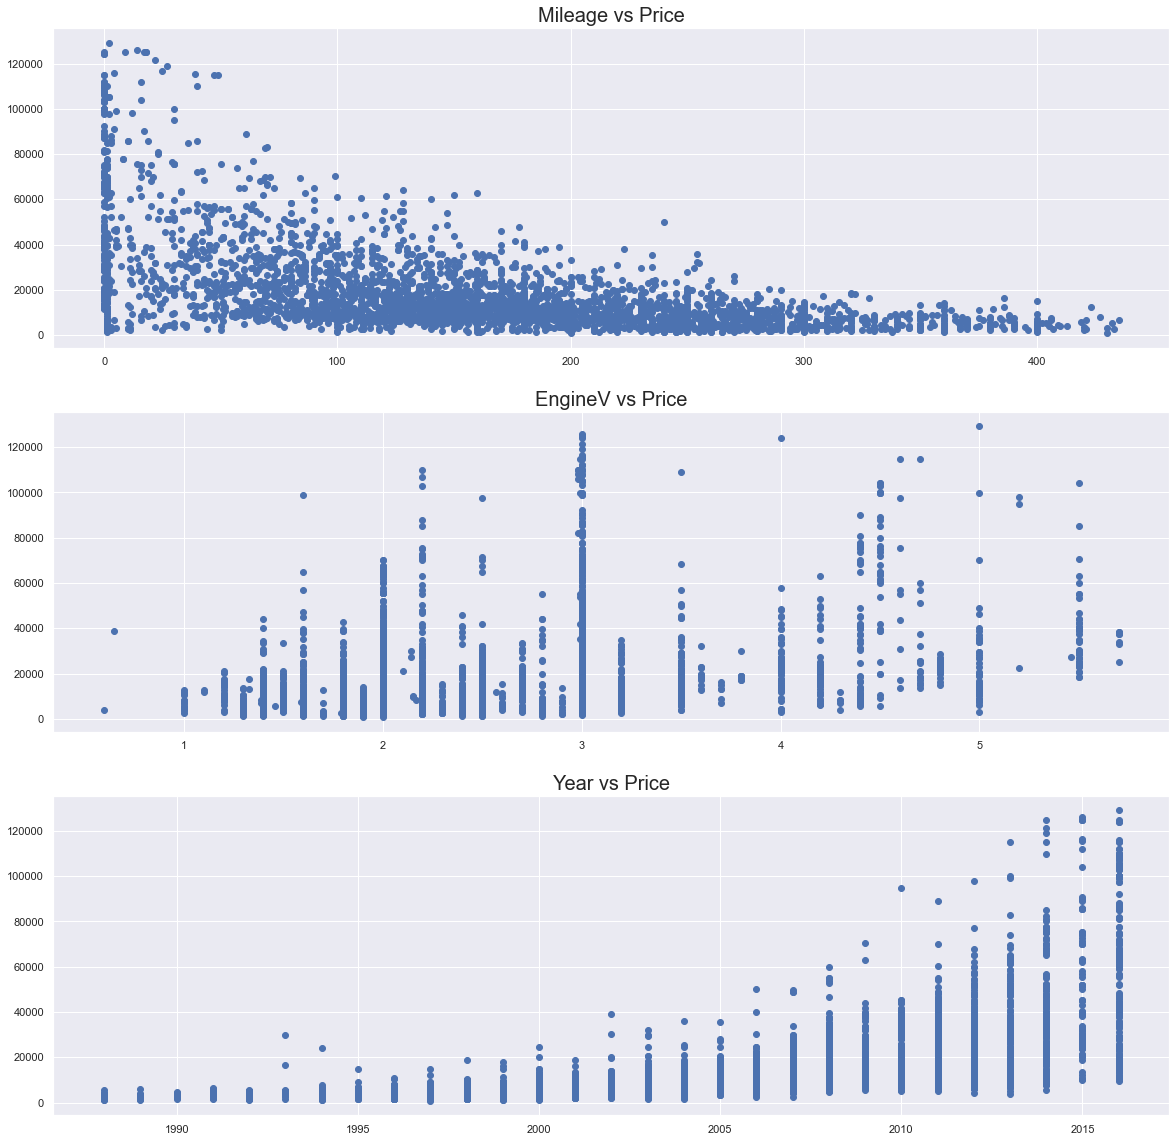

In [1006]:
f, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(20,20))
ax1.scatter(x=data['Mileage'], y=data['Price'] )  
ax1.set_title('Mileage vs Price' ,fontsize=20)
ax2.scatter(x=data['EngineV'], y=data['Price'] )  
ax2.set_title('EngineV vs Price', fontsize=20)
ax3.scatter(x=data['Year'], y=data['Price'] )  
ax3.set_title('Year vs Price', fontsize=20)


In [1007]:
## log for Price

data['log_Price'] = np.log(data['Price'])

data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


Text(0.5, 1.0, 'Year vs log_Price')

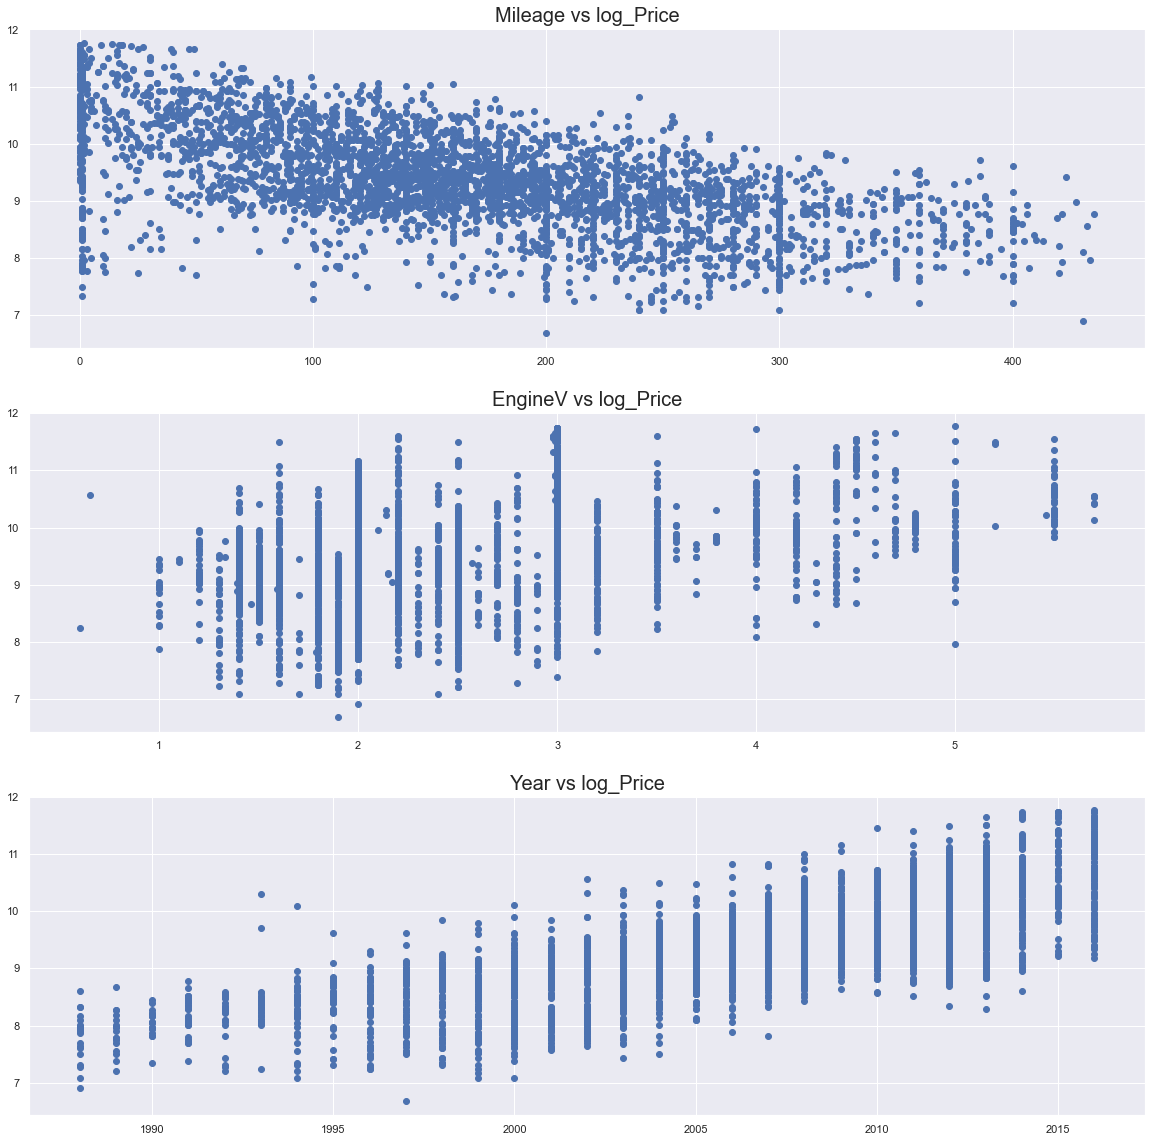

In [1008]:
# checkin exponantial again

f, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(20,20))
ax1.scatter(x=data['Mileage'], y=data['log_Price'] )  
ax1.set_title('Mileage vs log_Price' ,fontsize=20)
ax2.scatter(x=data['EngineV'], y=data['log_Price'] )  
ax2.set_title('EngineV vs log_Price', fontsize=20)
ax3.scatter(x=data['Year'], y=data['log_Price'] )  
ax3.set_title('Year vs log_Price', fontsize=20)


In [1009]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


## Multicolinaritty





In [1010]:
## chack if there is high corrolation between two independent variables using VIF

from statsmodels.stats.outliers_influence import  variance_inflation_factor

variables = data[['Mileage','Year','EngineV']]

vif = pd.DataFrame(index=['Mileage', 'Year', 'EngineV'], data=[[variance_inflation_factor(variables.values,0)],[variance_inflation_factor(variables.values,1)],[variance_inflation_factor(variables.values,2)]], columns=['vif'])

data = data.drop(labels='Year', axis=1) ## Year Vif have high level of Multi colinarity so we drop it


In [1014]:
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656


## Preprocessing categorical val

In [1021]:
# categic val are:  Brand, Body, Engine Type
data=data.drop(labels='Model', axis=1)

data_withDummys = pd.get_dummies(data, drop_first=True)

In [1022]:
data_withDummys.describe()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,160.860156,2.424310,9.408321,0.161979,0.191406,0.078646,0.112500,0.129688,0.220833,0.065885,0.094531,0.377865,0.096875,0.158854,0.147917,0.025521,0.356250,0.905729
std,95.742943,0.899824,0.873615,0.368480,0.393459,0.269220,0.316022,0.336003,0.414862,0.248114,0.292604,0.484917,0.295826,0.365588,0.355064,0.157721,0.478953,0.292243
min,0.000000,0.600000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,1.800000,8.881836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,157.500000,2.200000,9.352272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,226.000000,3.000000,9.975808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,435.000000,5.700000,11.769287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1023]:
data_withDummys.columns

Index(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [1024]:
## re arange Data
cols = [ 'log_Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

data_withDummys = data_withDummys[cols]


In [1025]:
data_withDummys.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [1026]:
## dependent and independent var


x = data_withDummys[[ 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]

y= data_withDummys[['log_Price']]


In [1027]:
#scale variable

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit(x)


In [1029]:
x_scaled = scaler.transform(x)

In [1030]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)
##train

reg = LinearRegression()

reg.fit(x_train, y_train)



LinearRegression()

In [1031]:

##prdict
prediction = reg.predict(x_train)


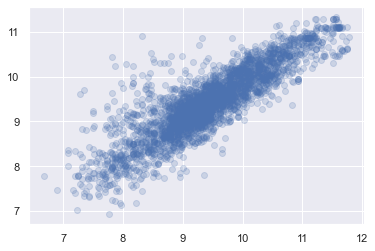

In [1097]:
plt.scatter(y_train, prediction, alpha=0.2)

In [1098]:
reg.score(x_train, y_train) # 0.75%

0.7530570002483704

In [1034]:
reg.coef_

array([[-0.45617436,  0.22605477,  0.0099362 ,  0.00635261, -0.13778812,
        -0.17638126, -0.05470873, -0.08743586, -0.13877431, -0.091966  ,
        -0.19138808, -0.12150762, -0.15546017, -0.13000643, -0.03103934,
        -0.14930045,  0.31834531]])

# Testing

In [1043]:
y_hat_test = reg.predict(x_test)

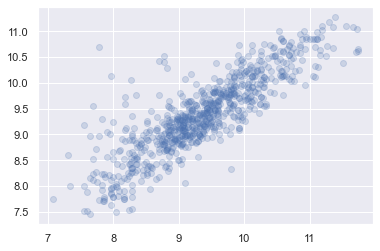

In [1045]:
plt.scatter(y_test, y_hat_test, alpha=0.2)

In [1113]:

Summary

# The highest negative impact on the Price is the Mileage 
# Renault is the most price droping brand
# sedan body is the most price droping 
# Petrol Engine Type cars are cheper then the others

,Features,Weight
0,Mileage,-0.456174
1,EngineV,0.226055
2,Brand_BMW,0.009936
3,Brand_Mercedes-Benz,0.006353
4,Brand_Mitsubishi,-0.137788
5,Brand_Renault,-0.176381
6,Brand_Toyota,-0.054709
7,Brand_Volkswagen,-0.087436
8,Body_hatch,-0.138774
9,Body_other,-0.091966


In [1083]:
Test_res['diff']= Test_res['Targets'] - Test_res['Prediction']

In [1093]:
Test_res['diff %'] = np.absolute(Test_res['diff']/Test_res['Targets'] * 100)

In [1094]:
Test_res.describe()

,Prediction,Targets,diff,diff %
count,768.000000,768.000000,768.000000,768.000000
mean,15701.730567,16928.424531,1226.693964,39.154030
std,12624.180103,17521.839532,10045.907834,86.826838
min,1715.361758,1199.000000,-41533.373814,0.070006
25%,7528.926017,6800.000000,-2372.734013,9.821921
50%,11436.737550,11250.000000,-36.120170,23.026701
75%,19213.378480,20400.000000,2776.653594,41.468524
max,79463.516115,125000.000000,84097.289451,1730.557242


In [1096]:
Test_res.sort_values('diff %')

,Prediction,Targets,diff,diff %
668,13009.100796,13000.0,-9.100796,0.070006
187,24866.346638,24900.0,33.653362,0.135154
318,3104.412101,3100.0,-4.412101,0.142326
463,3494.876779,3500.0,5.123221,0.146378
39,10475.623981,10500.0,24.376019,0.232153
...,...,...,...,...
633,37221.610438,6500.0,-30721.610438,472.640161
511,23159.527700,3900.0,-19259.527700,493.834044
263,14183.029440,2200.0,-11983.029440,544.683156
198,25380.518000,2900.0,-22480.518000,775.190276


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff %', ylabel='Density'>

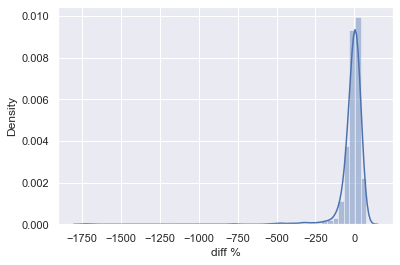

In [1091]:
sns.distplot(Test_res['diff %']) # Overestimation of Prediction

In [1120]:
test_topworse.sort_values('diff %')
#1% of the worst observations show a significant difference between the observation and the prediction which can indicate a lack of predictive data 

,Prediction,Targets,diff,diff %
378,32827.367973,6500.0,-26327.367973,405.036430
495,9634.418778,1900.0,-7734.418778,407.074673
136,33785.623508,6000.0,-27785.623508,463.093725
633,37221.610438,6500.0,-30721.610438,472.640161
511,23159.527700,3900.0,-19259.527700,493.834044
263,14183.029440,2200.0,-11983.029440,544.683156
198,25380.518000,2900.0,-22480.518000,775.190276
285,43933.373814,2400.0,-41533.373814,1730.557242


# conclusions


The model gives a good (but not amazing) result of predicting the price of a second-hand car.
Within the sample there are cars that are sold at a very low price compared to the prediction, there
is probably another element that affects the price of the car (damage to the car, accident, faded color, etc.)
In most cases the model manages to produce a good prediction of the price of the car.
In order to achieve better results, it is necessary to find additional factors that can affect the price of the car
or alternately to better check the abnormal observations